In [1]:
#import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA 

In [2]:
#import dataset
df = pd.read_csv("VM_dataset.csv")


In [3]:
df.columns

Index(['LAST_POLL', 'VMID', 'UUID', 'dom', 'rxbytes_slope', 'rxpackets_slope',
       'rxerrors_slope', 'rxdrops_slope', 'txbytes_slope', 'txpackets_slope',
       'txerrors_slope', 'txdrops_slope', 'timecpu_slope', 'timesys_slope',
       'timeusr_slope', 'state_slope', 'memmax_slope', 'mem_slope',
       'cpus_slope', 'cputime_slope', 'memactual_slope', 'memswap_in_slope',
       'memswap_out_slope', 'memmajor_fault_slope', 'memminor_fault_slope',
       'memunused_slope', 'memavailable_slope', 'memusable_slope',
       'memlast_update_slope', 'memdisk_cache_slope',
       'memhugetlb_pgalloc_slope', 'memhugetlb_pgfail_slope', 'memrss_slope',
       'vdard_req_slope', 'vdard_bytes_slope', 'vdawr_reqs_slope',
       'vdawr_bytes_slope', 'vdaerror_slope', 'hdard_req_slope',
       'hdard_bytes_slope', 'hdawr_reqs_slope', 'hdawr_bytes_slope',
       'hdaerror_slope', 'Status'],
      dtype='object')

In [4]:
df.head()

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0.0,0.0,79.8981,5.5275,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0000,0.0000,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0000,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0,0.0,0.0000,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0,0.0,0.0000,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [5]:
df.tail()

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
9605,1604601182,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.7897,30.9638,0.0,0.0,90.0,89.9974,...,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9606,1604601152,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.0519,29.5388,0.0,0.0,90.0,89.9977,...,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9607,1604601122,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,89.1474,45.9392,0.0,0.0,90.0,89.9950,...,0.0,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9608,1604601092,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,87.7974,26.5651,0.0,0.0,0.0,0.0000,...,0.0,20.1363,89.965,0.0,0.0,0.0,0.0,0.0,0.0,Attack
9609,1604601062,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

LAST_POLL                    0
VMID                         0
UUID                         0
dom                          0
rxbytes_slope               16
rxpackets_slope             16
rxerrors_slope              16
rxdrops_slope               16
txbytes_slope               16
txpackets_slope             16
txerrors_slope              16
txdrops_slope               16
timecpu_slope               16
timesys_slope               16
timeusr_slope               16
state_slope                 16
memmax_slope                16
mem_slope                   16
cpus_slope                  16
cputime_slope               16
memactual_slope             16
memswap_in_slope            16
memswap_out_slope           16
memmajor_fault_slope        16
memminor_fault_slope        16
memunused_slope             16
memavailable_slope          16
memusable_slope             16
memlast_update_slope        16
memdisk_cache_slope         16
memhugetlb_pgalloc_slope    16
memhugetlb_pgfail_slope     16
memrss_s

In [7]:
da = df.dropna()

In [8]:
da.isnull().sum()

LAST_POLL                   0
VMID                        0
UUID                        0
dom                         0
rxbytes_slope               0
rxpackets_slope             0
rxerrors_slope              0
rxdrops_slope               0
txbytes_slope               0
txpackets_slope             0
txerrors_slope              0
txdrops_slope               0
timecpu_slope               0
timesys_slope               0
timeusr_slope               0
state_slope                 0
memmax_slope                0
mem_slope                   0
cpus_slope                  0
cputime_slope               0
memactual_slope             0
memswap_in_slope            0
memswap_out_slope           0
memmajor_fault_slope        0
memminor_fault_slope        0
memunused_slope             0
memavailable_slope          0
memusable_slope             0
memlast_update_slope        0
memdisk_cache_slope         0
memhugetlb_pgalloc_slope    0
memhugetlb_pgfail_slope     0
memrss_slope                0
vdard_req_

In [9]:
da.dtypes

LAST_POLL                     int64
VMID                          int64
UUID                         object
dom                          object
rxbytes_slope               float64
rxpackets_slope             float64
rxerrors_slope              float64
rxdrops_slope               float64
txbytes_slope               float64
txpackets_slope             float64
txerrors_slope              float64
txdrops_slope               float64
timecpu_slope               float64
timesys_slope               float64
timeusr_slope               float64
state_slope                 float64
memmax_slope                float64
mem_slope                   float64
cpus_slope                  float64
cputime_slope               float64
memactual_slope             float64
memswap_in_slope            float64
memswap_out_slope           float64
memmajor_fault_slope        float64
memminor_fault_slope        float64
memunused_slope             float64
memavailable_slope          float64
memusable_slope             

In [10]:
data_cat = da.select_dtypes(include=["object"]).copy()

In [11]:
data_cat.head()

,UUID,dom,Status
0,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
1,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
2,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
3,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
4,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal


In [12]:
data_num = da.select_dtypes(include=["int","float"]).copy()

In [13]:
data_num.head()

,LAST_POLL,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope
0,1604455173,7,88.2065,30.1414,0.0,0.0,79.8981,5.5275,0.0,0.0,...,0.0,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0
1,1604455142,7,87.8708,27.3499,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0
2,1604455113,7,87.8865,27.2996,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0
3,1604455082,7,87.8760,27.4076,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0
4,1604455055,7,87.7241,25.8210,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#remove features which has only 0
da.loc[:,(da!=0).any(axis=0)]

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,...,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,79.8981,5.5275,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,24.3045,89.9850,0.0,0.0,Normal
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0000,0.0000,73.8278,0.0000,...,0.0,0.0,0.0000,0.0,0.0,5.9061,89.8986,0.0,0.0,Normal
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,32.8285,89.9897,0.0,0.0,Normal
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,4.2364,89.8741,0.0,0.0,Normal
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,22.7510,89.9864,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9604,1604601212,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.0519,29.5388,90.0000,89.9974,73.3008,23.4287,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,Attack
9605,1604601182,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.7897,30.9638,90.0000,89.9974,0.0000,21.8014,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,Attack
9606,1604601152,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.0519,29.5388,90.0000,89.9977,0.0000,26.5651,...,0.0,0.0,-81.6341,0.0,0.0,0.0000,0.0000,0.0,0.0,Attack
9607,1604601122,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,89.1474,45.9392,90.0000,89.9950,0.0000,13.1340,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,Attack


In [15]:
da.shape

(9594, 44)

In [16]:
da.head()

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0.0,0.0,79.8981,5.5275,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0000,0.0000,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0000,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0,0.0,0.0000,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0,0.0,0.0000,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [17]:
import warnings
warnings.filterwarnings("ignore")
da['Status'] = da["Status"].replace(["Normal","Attack"],[0,1])

In [18]:
da

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0.0,0.0,79.8981,5.5275,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0000,0.0000,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0000,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0,0.0,0.0000,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0,0.0,0.0000,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9604,1604601212,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.0519,29.5388,0.0,0.0,90.0000,89.9974,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1
9605,1604601182,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.7897,30.9638,0.0,0.0,90.0000,89.9974,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1
9606,1604601152,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,88.0519,29.5388,0.0,0.0,90.0000,89.9977,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1
9607,1604601122,6,cf1325c0-957a-4744-8912-377f3f477971,one-43,89.1474,45.9392,0.0,0.0,90.0000,89.9950,...,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1


In [19]:
data1 = da.drop(['LAST_POLL', 'VMID', 'UUID', 'dom'],axis=1)

In [20]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9594 entries, 0 to 9608
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rxbytes_slope             9594 non-null   float64
 1   rxpackets_slope           9594 non-null   float64
 2   rxerrors_slope            9594 non-null   float64
 3   rxdrops_slope             9594 non-null   float64
 4   txbytes_slope             9594 non-null   float64
 5   txpackets_slope           9594 non-null   float64
 6   txerrors_slope            9594 non-null   float64
 7   txdrops_slope             9594 non-null   float64
 8   timecpu_slope             9594 non-null   float64
 9   timesys_slope             9594 non-null   float64
 10  timeusr_slope             9594 non-null   float64
 11  state_slope               9594 non-null   float64
 12  memmax_slope              9594 non-null   float64
 13  mem_slope                 9594 non-null   float64
 14  cpus_slo

In [21]:
data1 = data1.loc[:,(data1!=0).any(axis=0)]

In [22]:
data1.head()

,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,cputime_slope,memminor_fault_slope,...,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope,Status
0,88.2065,30.1414,79.8981,5.5275,0.0000,0.0,0.0739,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24.3045,89.9850,0.0,0.0,0
1,87.8708,27.3499,0.0000,0.0000,73.8278,0.0,0.0593,0.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.9061,89.8986,0.0,0.0,0
2,87.8865,27.2996,0.0000,0.0000,0.0000,0.0,0.0554,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,32.8285,89.9897,0.0,0.0,0
3,87.8760,27.4076,0.0000,0.0000,0.0000,0.0,0.0637,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.2364,89.8741,0.0,0.0,0
4,87.7241,25.8210,0.0000,0.0000,0.0000,0.0,0.1109,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,22.7510,89.9864,0.0,0.0,0


In [23]:
data1.tail()

,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,cputime_slope,memminor_fault_slope,...,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope,Status
9604,88.0519,29.5388,90.0,89.9974,73.3008,23.4287,8.1381,0.0,90.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.000,0.0,0.0,1
9605,88.7897,30.9638,90.0,89.9974,0.0000,21.8014,8.0445,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.000,0.0,0.0,1
9606,88.0519,29.5388,90.0,89.9977,0.0000,26.5651,8.4934,0.0,0.0,0.0,...,0.0,0.0,-81.6341,0.0,0.0,0.0000,0.000,0.0,0.0,1
9607,89.1474,45.9392,90.0,89.9950,0.0000,13.1340,4.1562,0.0,0.0,0.0,...,0.0,0.0,0.0000,0.0,0.0,0.0000,0.000,0.0,0.0,1
9608,87.7974,26.5651,0.0,0.0000,0.0000,0.0000,0.0573,0.0,0.0,0.0,...,0.0,0.0,57.9946,0.0,0.0,20.1363,89.965,0.0,0.0,1


In [24]:
data1.columns

Index(['rxbytes_slope', 'rxpackets_slope', 'txbytes_slope', 'txpackets_slope',
       'timecpu_slope', 'timesys_slope', 'timeusr_slope', 'state_slope',
       'cputime_slope', 'memminor_fault_slope', 'memunused_slope',
       'memusable_slope', 'memlast_update_slope', 'memrss_slope',
       'vdard_req_slope', 'vdard_bytes_slope', 'vdawr_reqs_slope',
       'vdawr_bytes_slope', 'hdard_req_slope', 'hdard_bytes_slope', 'Status'],
      dtype='object')

### Standardize the Data

In [25]:
X = data1.drop(['Status'],axis=1)

In [26]:
X.head()

,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,cputime_slope,memminor_fault_slope,memunused_slope,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope
0,88.2065,30.1414,79.8981,5.5275,0.0000,0.0,0.0739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.3045,89.9850,0.0,0.0
1,87.8708,27.3499,0.0000,0.0000,73.8278,0.0,0.0593,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9061,89.8986,0.0,0.0
2,87.8865,27.2996,0.0000,0.0000,0.0000,0.0,0.0554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.8285,89.9897,0.0,0.0
3,87.8760,27.4076,0.0000,0.0000,0.0000,0.0,0.0637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.2364,89.8741,0.0,0.0
4,87.7241,25.8210,0.0000,0.0000,0.0000,0.0,0.1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.7510,89.9864,0.0,0.0


In [27]:
#Separating out the target
y = data1['Status']


In [28]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9604    1
9605    1
9606    1
9607    1
9608    1
Name: Status, Length: 9594, dtype: int64

In [29]:
#Standardizing the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [30]:
scaled_X

array([[-0.0401753 , -0.28580775,  1.16921879, ...,  0.34744447,
        -0.02219548, -0.02501564],
       [-0.47113377, -0.43597049, -0.77125034, ...,  0.34434376,
        -0.02219548, -0.02501564],
       [-0.45097872, -0.43867627, -0.77125034, ...,  0.34761314,
        -0.02219548, -0.02501564],
       ...,
       [-0.2386447 , -0.31822332,  1.41456161, ..., -2.88192564,
        -0.02219548, -0.02501564],
       [ 1.16771514,  0.56400092,  1.41456161, ..., -2.88192564,
        -0.02219548, -0.02501564],
       [-0.5653618 , -0.47818711, -0.77125034, ...,  0.34672671,
        -0.02219548, -0.02501564]])

## PCA

### Visualize 2D Projection

In [31]:
target_names = ['Normal', "Attack"]

In [32]:
pca = PCA(n_components = 2)
x = pca.fit(scaled_X).transform(scaled_X)

In [33]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.23943448 0.18447475]


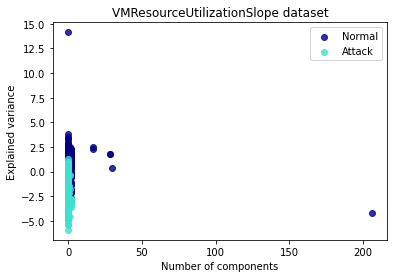

In [34]:
plt.figure()
colors = ["navy", "turquoise"]
for color, i, target_names in zip(colors, [0, 1], target_names):
    plt.scatter(
        x[y == i, 0], x[y == i, 1], color=color, alpha=0.8,label=target_names
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("VMResourceUtilizationSlope dataset")
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [35]:
#standardize the data

X_N = data1.drop(['txbytes_slope', 'txpackets_slope',
       'timecpu_slope', 'timesys_slope', 'timeusr_slope', 'state_slope',
       'cputime_slope', 'memminor_fault_slope', 'memunused_slope',
       'memusable_slope', 'memlast_update_slope', 'memrss_slope',
       'vdard_req_slope', 'vdard_bytes_slope', 'vdawr_reqs_slope',
       'vdawr_bytes_slope', 'hdard_req_slope', 'hdard_bytes_slope', 'Status'],axis=1)

In [36]:
X_N

,rxbytes_slope,rxpackets_slope
0,88.2065,30.1414
1,87.8708,27.3499
2,87.8865,27.2996
3,87.8760,27.4076
4,87.7241,25.8210
...,...,...
9604,88.0519,29.5388
9605,88.7897,30.9638
9606,88.0519,29.5388
9607,89.1474,45.9392


In [37]:
y = data1['Status']

In [38]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9604    1
9605    1
9606    1
9607    1
9608    1
Name: Status, Length: 9594, dtype: int64

In [39]:
target_names = ['Normal', "Attack"]

In [40]:
pca = PCA(n_components = 2)
x = pca.fit(X_N).transform(X_N)

In [41]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [9.99641057e-01 3.58942723e-04]


Text(0.5, 1.0, 'PCA of Networkdataset')

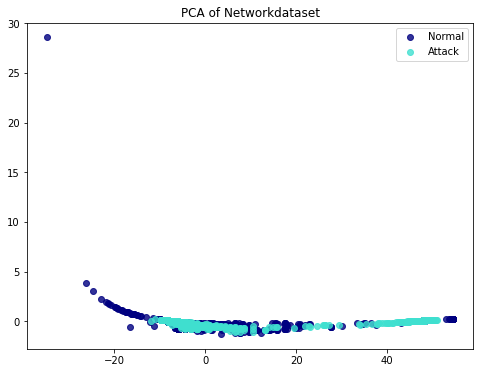

In [42]:
plt.figure(2, figsize=(8, 6))
colors = ["navy", "turquoise"]
for color, i, target_names in zip(colors, [0, 1], target_names):
    plt.scatter(
        x[y == i, 0], x[y == i, 1], color=color, alpha=0.8,label=target_names
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.title("PCA of Networkdataset")

In [43]:
#standardize the data

X_M = data1.drop(['rxbytes_slope', 'rxpackets_slope', 
       'vdard_req_slope', 'vdard_bytes_slope', 'vdawr_reqs_slope',
       'vdawr_bytes_slope', 'hdard_req_slope', 'hdard_bytes_slope', 'Status'],axis=1)

In [44]:
X_M

,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,cputime_slope,memminor_fault_slope,memunused_slope,memusable_slope,memlast_update_slope,memrss_slope
0,79.8981,5.5275,0.0000,0.0000,0.0739,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,0.0000,0.0000,73.8278,0.0000,0.0593,0.0,90.0,0.0,0.0,0.0,0.0,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0554,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0637,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
9604,90.0000,89.9974,73.3008,23.4287,8.1381,0.0,90.0,0.0,0.0,0.0,0.0,0.0000
9605,90.0000,89.9974,0.0000,21.8014,8.0445,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
9606,90.0000,89.9977,0.0000,26.5651,8.4934,0.0,0.0,0.0,0.0,0.0,0.0,-81.6341
9607,90.0000,89.9950,0.0000,13.1340,4.1562,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


In [45]:
y = data1['Status']

In [46]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9604    1
9605    1
9606    1
9607    1
9608    1
Name: Status, Length: 9594, dtype: int64

In [47]:
target_names = ["Normal", "Attack"]

In [48]:
pca = PCA()
x = pca.fit(X_M).transform(X_M)

In [49]:
#percentage of variance expalined of each components
print(
      "explained variance ratio(components): %s"
      %str(pca.explained_variance_ratio_) 
     )

explained variance ratio(components): [4.54418342e-01 3.21691649e-01 1.41129615e-01 6.11044906e-02
 1.28956239e-02 6.99515029e-03 1.40198482e-03 3.29137172e-04
 3.40079590e-05 1.71396519e-33 3.13196403e-36 2.87573113e-40]


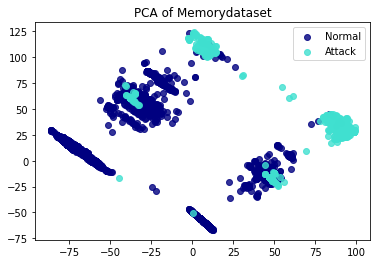

In [50]:
plt.figure()
colors = ["navy","turquoise"]
for color, i, target_names in zip(colors, [0,1], target_names):
    plt.scatter(
    x[y == i, 0], x[y == i, 1], color=color, alpha=0.8,label=target_names
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Memorydataset")   
plt.show()

In [51]:
#Standardize the data
X_D = data1.drop(['rxbytes_slope', 'rxpackets_slope', 'txbytes_slope', 'txpackets_slope',
       'timecpu_slope', 'timesys_slope', 'timeusr_slope', 'state_slope',
       'cputime_slope', 'memminor_fault_slope', 'memunused_slope',
       'memusable_slope', 'memlast_update_slope', 'memrss_slope','Status'],axis=1)

In [52]:
X_D

,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope
0,0.0,0.0,24.3045,89.9850,0.0,0.0
1,0.0,0.0,5.9061,89.8986,0.0,0.0
2,0.0,0.0,32.8285,89.9897,0.0,0.0
3,0.0,0.0,4.2364,89.8741,0.0,0.0
4,0.0,0.0,22.7510,89.9864,0.0,0.0
...,...,...,...,...,...,...
9604,0.0,0.0,0.0000,0.0000,0.0,0.0
9605,0.0,0.0,0.0000,0.0000,0.0,0.0
9606,0.0,0.0,0.0000,0.0000,0.0,0.0
9607,0.0,0.0,0.0000,0.0000,0.0,0.0


In [53]:
y = data1['Status']

In [54]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9604    1
9605    1
9606    1
9607    1
9608    1
Name: Status, Length: 9594, dtype: int64

### pca

In [55]:
target_names = ["Normal", "Attack"]

In [56]:
pca = PCA()
x = pca.fit(X_D).transform(X_D)

In [57]:
#percentage of variance explained of each components
print(
     "expalined variance ratio(components:) %s"
    %str(pca.explained_variance_ratio_)
     )

expalined variance ratio(components:) [5.96045681e-01 2.58356664e-01 1.26931719e-01 1.54641424e-02
 3.08258689e-03 1.19206700e-04]


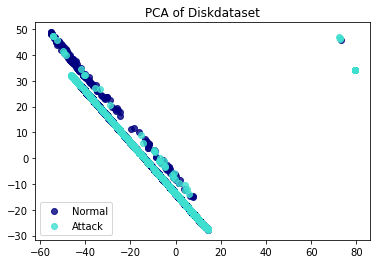

In [58]:
plt.figure()
colors = ["navy","turquoise"]
for color, i, target_names in zip(colors, [0,1], target_names):
    plt.scatter(
    x[y == i, 0], x[y == i, 1], color=color, alpha=0.8,label=target_names
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Diskdataset")   
plt.show()               

### PCA with Decoding

In [59]:
X = data1.drop(['Status'],axis=1)

In [60]:
X

,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,cputime_slope,memminor_fault_slope,memunused_slope,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope
0,88.2065,30.1414,79.8981,5.5275,0.0000,0.0000,0.0739,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,24.3045,89.9850,0.0,0.0
1,87.8708,27.3499,0.0000,0.0000,73.8278,0.0000,0.0593,0.0,90.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,5.9061,89.8986,0.0,0.0
2,87.8865,27.2996,0.0000,0.0000,0.0000,0.0000,0.0554,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,32.8285,89.9897,0.0,0.0
3,87.8760,27.4076,0.0000,0.0000,0.0000,0.0000,0.0637,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,4.2364,89.8741,0.0,0.0
4,87.7241,25.8210,0.0000,0.0000,0.0000,0.0000,0.1109,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,22.7510,89.9864,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9604,88.0519,29.5388,90.0000,89.9974,73.3008,23.4287,8.1381,0.0,90.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
9605,88.7897,30.9638,90.0000,89.9974,0.0000,21.8014,8.0445,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0
9606,88.0519,29.5388,90.0000,89.9977,0.0000,26.5651,8.4934,0.0,0.0,0.0,0.0,0.0,0.0,-81.6341,0.0,0.0,0.0000,0.0000,0.0,0.0
9607,89.1474,45.9392,90.0000,89.9950,0.0000,13.1340,4.1562,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0


In [61]:
y = data1['Status']

In [62]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9604    1
9605    1
9606    1
9607    1
9608    1
Name: Status, Length: 9594, dtype: int64

In [63]:
#transform the data


In [64]:
target_names = ["Normal", "Attack"]

In [65]:
pca = PCA()

In [66]:
x = pca.fit(X.T).transform(X.T)

In [67]:
#percentage of variance explained of each components
print(
     "expalined variance ratio(components:) %s"
    %str(pca.explained_variance_ratio_)
     )

expalined variance ratio(components:) [6.35845622e-01 1.59465710e-01 8.39498681e-02 4.21202931e-02
 2.60423771e-02 1.95099361e-02 1.00548544e-02 9.11170172e-03
 7.87111456e-03 2.99849957e-03 1.25907400e-03 1.12621071e-03
 3.27427860e-04 2.35441236e-04 6.71545312e-05 9.00122266e-06
 5.71393058e-06 2.96914528e-30 1.55378182e-32 3.29818658e-33]


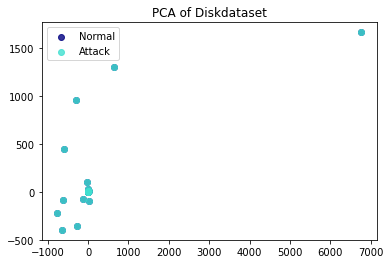

In [68]:
plt.figure()
colors = ["navy","turquoise"]
y == i
for color, i, target_names in zip(colors, [0,1], target_names):
    plt.scatter(
    x[0], x[1], color=color, alpha=0.8,label=target_names
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Diskdataset")   
plt.show()   

In [69]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(1)
X_orig = np.random.rand(10, 2)
X_re_orig = pca.inverse_transform(pca.fit_transform(X_orig))

plt.scatter(X_orig[:, 0], X_orig[:, 1], label='Original points')
plt.scatter(X_re_orig[:, 0], X_re_orig[:, 1], label='InverseTransform')
plt.plot([X_orig[i, 0], X_re_orig[i, 0]], [X_orig[i, 1], X_re_orig[i, 1]]) for i in range(10)]
plt.legend()
plt.show()

SyntaxError: invalid syntax (3914583717.py, line 9)

## PCA WITH IMAGE

In [70]:
!pip install opencv-python



In [72]:
import cv2
import numpy as np

img = cv2.imread('pexels-alex-knight-2599244.jpg')

#down the scale image size
height = 200
width  = 250
dimension = (height, width)

resized = cv2.resize(img,dimension, interpolation = cv2.INTER_AREA)

print(resized.shape)
cv2.imshow('output',resized)
cv2.imwrite('resized_pexels-alex-knight-2599244.jpg',resized)

cv2.waitKey(0)
cv2.destroyAllWindows()

(250, 200, 3)
